In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt


#read csv file and display the data  
data = pd.read_csv("/Users/jeetthakurela/Downloads/1.Google play store case study/googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Check the datatypes of all the columns of the dataframe
data.info()



#Check the number of null values in the columns
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#Drop the rows having null values in the Rating field
data1 = data[-data.Rating.isnull()]

#Check the shape of the dataframe
data1.shape
# Check the number of nulls in the Rating field again to cross-verify
data1.Rating.isnull().sum()

#Question
#Check the number of nulls in the dataframe again and find the total number of null values
data1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [5]:
#Inspect the nulls in the Android Version column
data1[data1['Android Ver'].isnull()]


#Drop the row having shifted values
data1 = data1[-(data1['Android Ver'].isnull()& (data1.Category == '1.9'))]
#Check the nulls againin Android version column to cross-verify
data1[data1['Android Ver'].isnull()]



#Check the most common value in the Android version column
data1['Android Ver'].value_counts()


#Fill up the nulls in the Android Version column with the above value
#inp1['Android Ver'].mode()[0]
data1['Android Ver'] = data1['Android Ver'].fillna(data1['Android Ver'].mode()[0])
#Check the nulls in the Android version column again to cross-verify
data1['Android Ver'].value_counts()



#Check the nulls in the entire dataframe again
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [6]:
data1['Current Ver'].value_counts()


#Replace the nulls in the Current version column with the above value
#inp1['Current Ver'].mode()[0]
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])
data1['Current Ver'].value_counts()


# Question : Check the most common value in the Current version column again
data1['Current Ver'].mode()

#Check the datatypes of all the columns 
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [7]:
data1.Price = data1.Price.apply(lambda x: 0 if x =='0' else float(x[1:]))
#Verify the dtype of Price once again
data1.Price.dtype

#Analyse the Reviews column
data1.Reviews.value_counts()


#Change the dtype of this column
data1.Reviews =  data1.Reviews.astype("int32")

#Check the quantitative spread of this dataframe
data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [8]:
data1.Installs.head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [9]:
def clean_installs(val):
    return int(val.replace(",","").replace("+", ""))
type(clean_installs('3,000,000++'))

data1.Installs = data1.Installs.apply(clean_installs)
data1.Installs.describe()


data1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [10]:
#Perform the sanity checks on the Reviews column
data1[(data1.Reviews > data1.Installs)]

data1 = data1[(data1.Reviews <= data1.Installs)]
data1[(data1.Reviews  > data1.Installs)].shape

#perform the sanity checks on prices of free apps 
data1[(data1.Type=='Free') & (data1.Price >0)].shape

(0, 13)

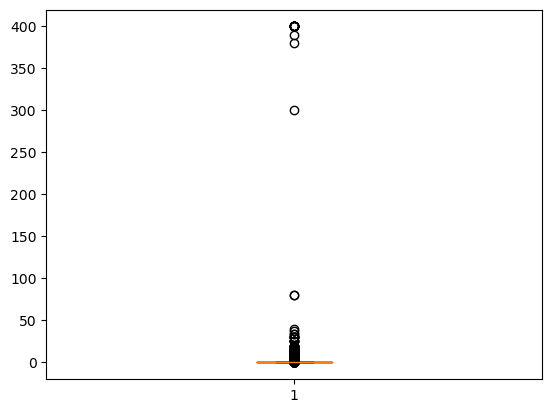

In [12]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
#Create a box plot for the price column
plt.boxplot(data1.Price)
plt.show()

In [13]:
#Check the apps with price more than 200
data1[data1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [14]:
#Clean the Price column
data1 = data1[data1.Price < 200]

<Axes: >

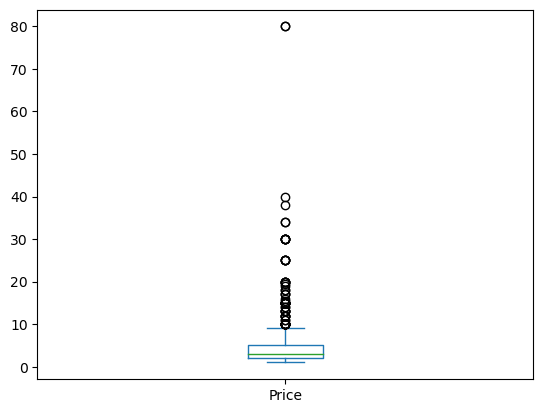

In [15]:
#Create a box plot for paid apps
data1[data1.Price>0].Price.plot.box()

In [16]:
#Check the apps with price more than 30
data1[data1.Price>30]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1.3M,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1.8M,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [17]:
#Clean the Price column again
data1 = data1[data1.Price<=30]
data.shape

(10841, 13)

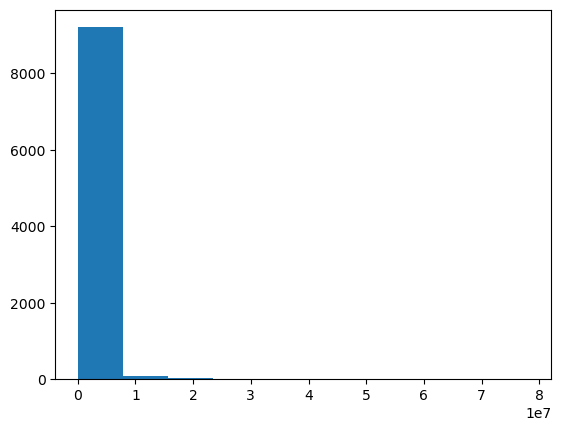

In [18]:
#Create a histogram of the Reviews
plt.hist(data1.Reviews)
plt.show()


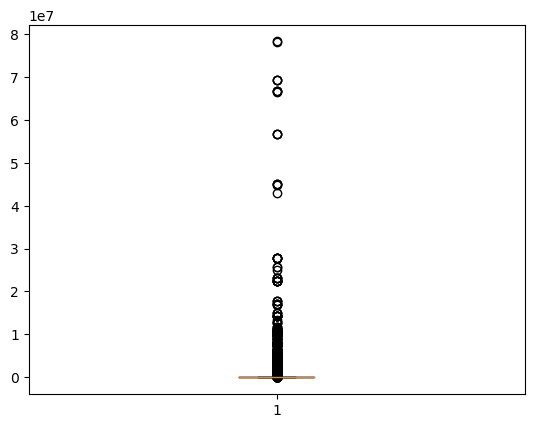

In [19]:
#Create a boxplot of the Reviews column
plt.boxplot(data1.Reviews)
plt.show()

In [20]:
#Check records with 1 million reviews
data1[data1.Reviews >= 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35M,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,Varies with device,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25M,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53M,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12M,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


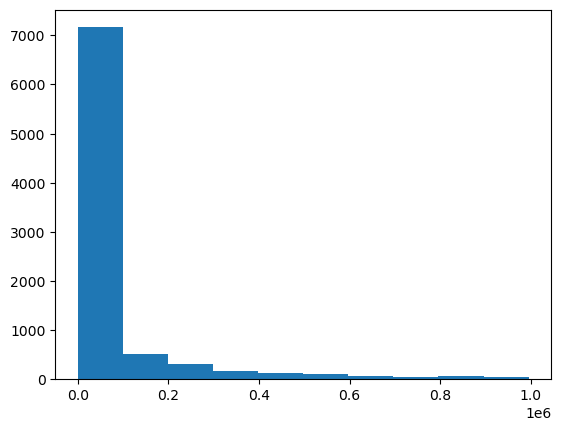

In [22]:
#Drop the above records
data1 = data1[data1.Reviews <= 1000000]
data1.shape

#Question - Create a histogram again and check the peaks
plt.hist(data1.Reviews)
plt.show()

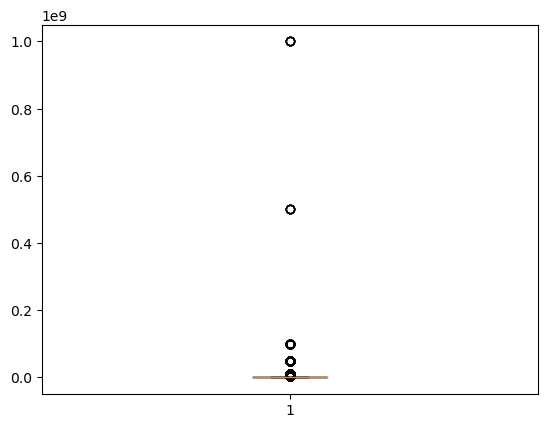

In [23]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(data1.Installs)
plt.show()

In [24]:
data1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [25]:
data1[data1.Installs >=100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,Varies with device,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11M,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
369,Android Messages,COMMUNICATION,4.2,781810,Varies with device,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
396,Android Messages,COMMUNICATION,4.2,781810,Varies with device,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
888,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,12M,100000000,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,Google Docs,PRODUCTIVITY,4.3,815974,Varies with device,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8636,Google Keep,PRODUCTIVITY,4.4,691474,Varies with device,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590,12M,100000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up


In [27]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
data1 = data1[data1.Installs <= 100000000] 
data1.shape


(8624, 13)

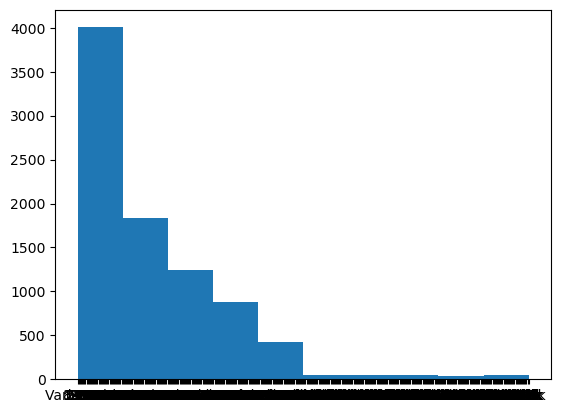

In [28]:

#Plot a histogram for Size as well.
plt.hist(data1.Size)
plt.show()

In [32]:
data1.Size.describe()

count                   8624
unique                   413
top       Varies with device
freq                    1266
Name: Size, dtype: object

In [35]:
#now with the help of seaborn
import seaborn as sns

<Axes: xlabel='Size', ylabel='Rating'>

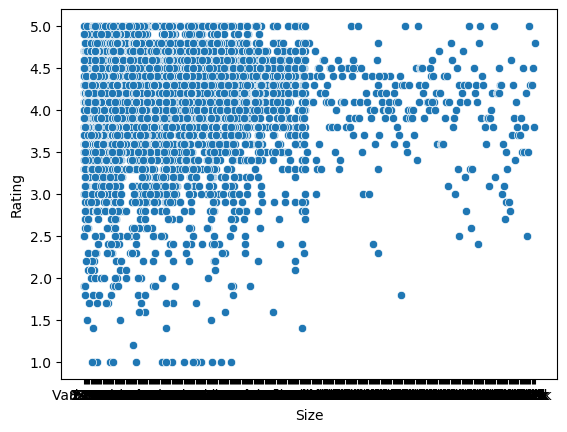

In [58]:
sns.scatterplot(x=data1['Size'],y=data1['Rating']) 

<Axes: xlabel='Price', ylabel='Rating'>

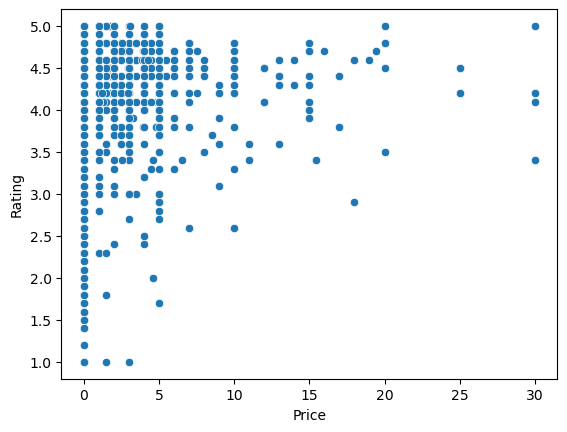

In [60]:
sns.scatterplot(x=data1['Price'],y=data1['Rating']) 

<Axes: xlabel='Size', ylabel='Price'>

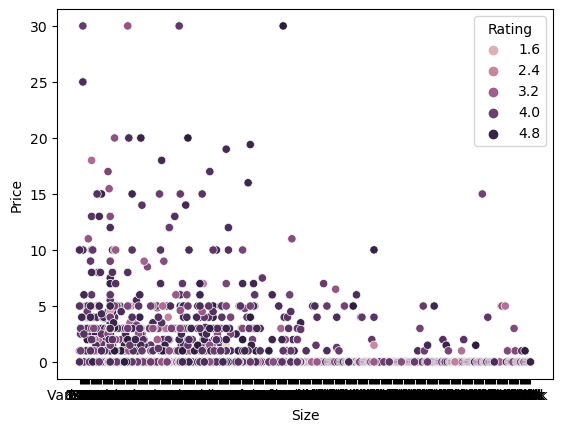

In [48]:
sns.scatterplot(x=data1['Size'],y=data1['Price'] ,hue=data1['Rating']) 

<Axes: xlabel='Rating', ylabel='Installs'>

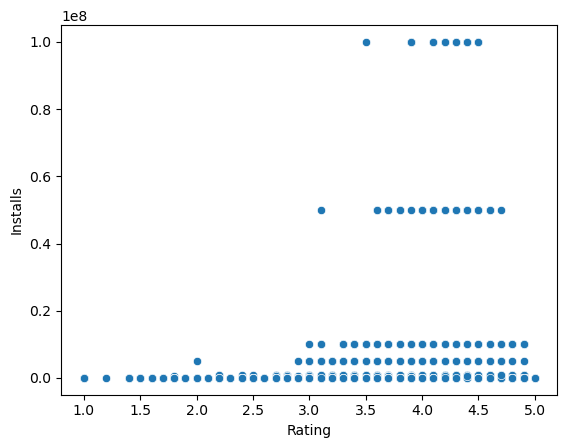

In [62]:
sns.scatterplot(x=data1['Rating'],y=data1['Installs']) 